# Credit Card Approval Prediction

This notebook documents the model development process for predicting credit card approvals using logistic regression. It includes data exploration, preprocessing steps, model training, and evaluation.

Accuracy: 0.7798

Confusion Matrix:
[[22861 13092]
 [ 8928 55119]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.64      0.67     35953
           1       0.81      0.86      0.83     64047

    accuracy                           0.78    100000
   macro avg       0.76      0.75      0.75    100000
weighted avg       0.78      0.78      0.78    100000


Feature Importance:
              feature  importance
3        credit_score    1.270254
1       annual_income    1.053970
5          debt_ratio    0.842414
0                 age    0.151375
2      years_employed    0.128501
4    num_credit_cards    0.003168
9  property_ownership    0.002709
7     employment_type    0.001778
6     education_level    0.001064
8      marital_status    0.000335


C:\Users\Dell\AppData\Local\Temp\ipykernel_9636\1662788357.py:119: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Dell\AppData\Local\Temp\ipykernel_9636\1662788357.py:161: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Dell\AppData\Local\Temp\ipykernel_9636\1662788357.py:176: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Dell\AppData\Local\Temp\ipykernel_9636\1662788357.py:186: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` var

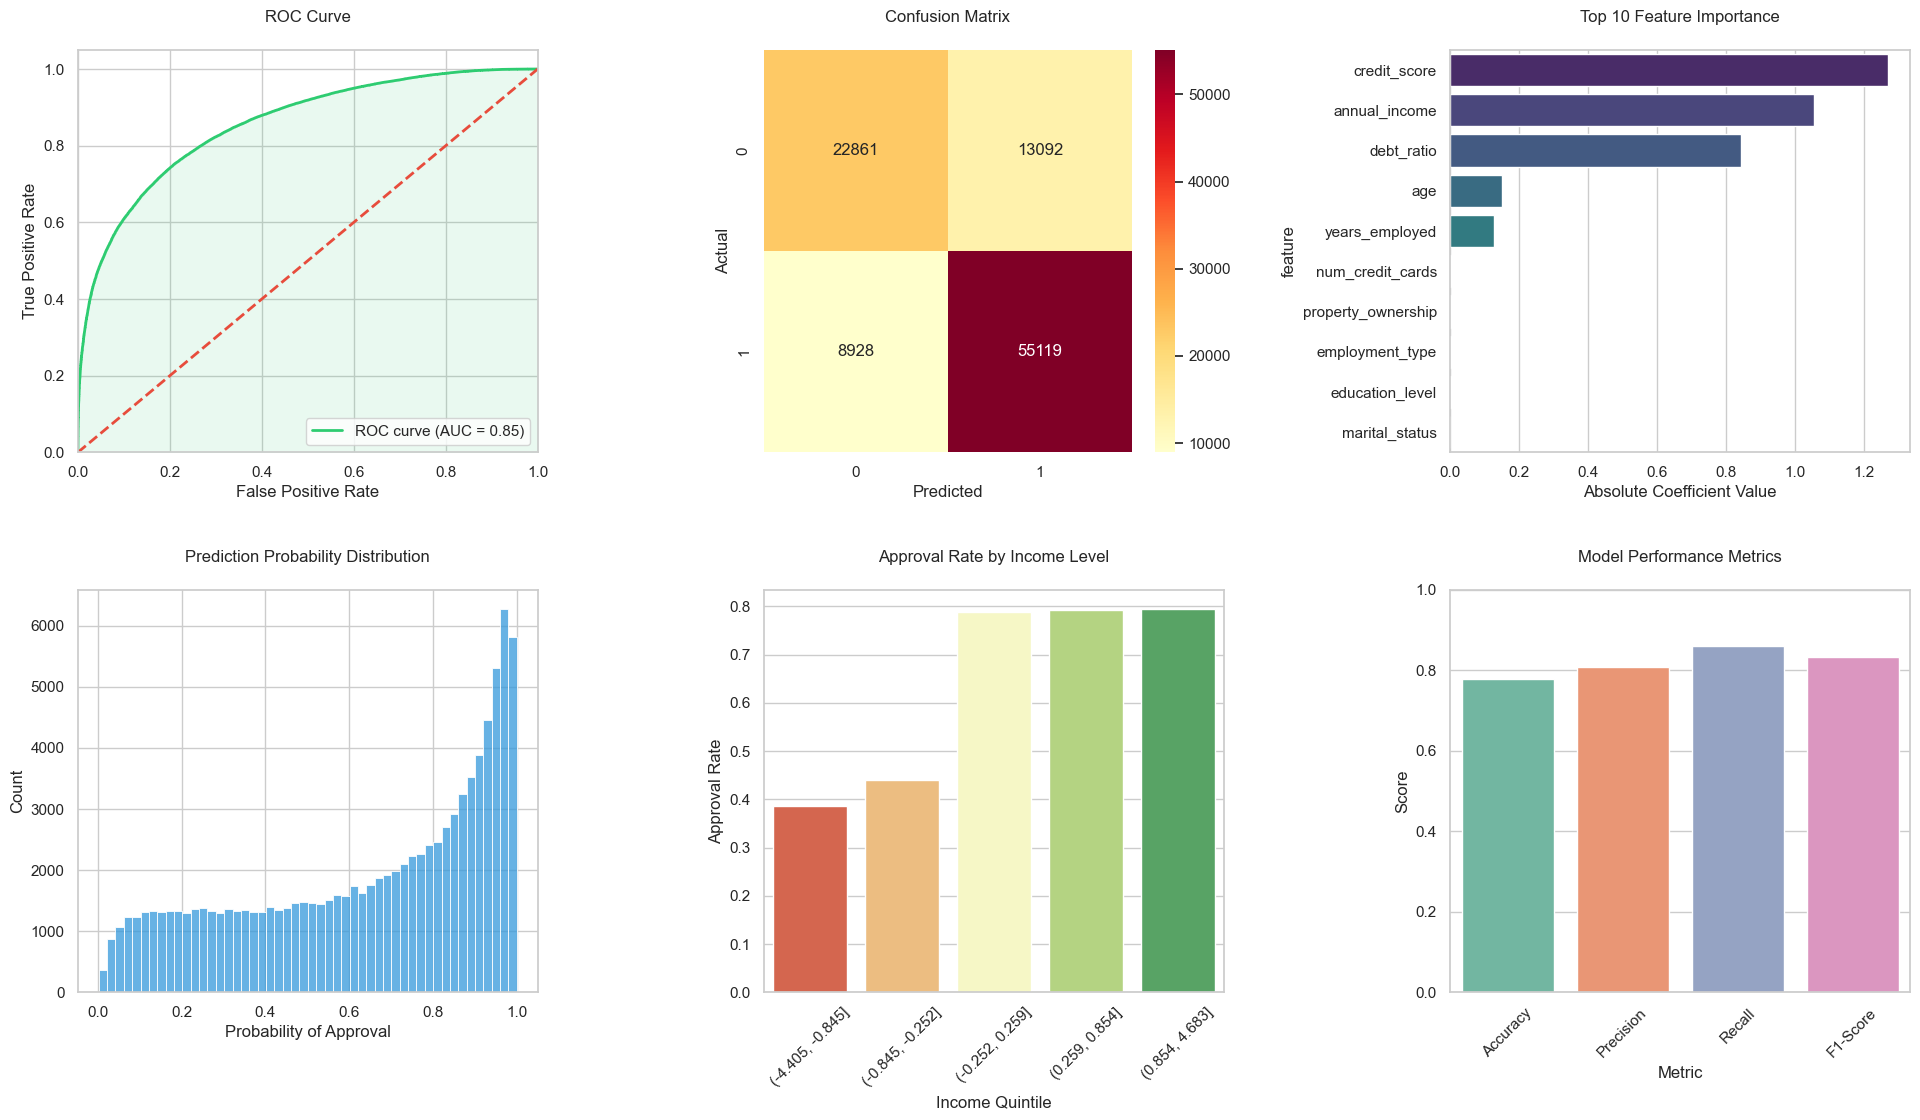


=== Model Performance Summary ===
Accuracy: 0.7798

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.64      0.67     35953
           1       0.81      0.86      0.83     64047

    accuracy                           0.78    100000
   macro avg       0.76      0.75      0.75    100000
weighted avg       0.78      0.78      0.78    100000


Feature Importance:
              feature  importance
3        credit_score    1.270254
1       annual_income    1.053970
5          debt_ratio    0.842414
0                 age    0.151375
2      years_employed    0.128501
4    num_credit_cards    0.003168
9  property_ownership    0.002709
7     employment_type    0.001778
6     education_level    0.001064
8      marital_status    0.000335

CREDIT CARD APPROVAL PREDICTION SUMMARY

📊 OVERALL MODEL PERFORMANCE
• The model correctly predicts credit card approvals 78.0% of the time
• When the model predicts an approval, it is correct 80.8% of

In [16]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                           roc_curve, auc)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Load the data from CSV files
data_dir = os.path.join('..', 'src', 'data')
train_data = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test_data = pd.read_csv(os.path.join(data_dir, 'test.csv'))

def clean_data(df):
    # Create a copy to avoid modifying original data
    df = df.copy()
    
    # Remove duplicates
    df = df.drop_duplicates()
    
    # Handle categorical variables
    categorical_columns = ['education_level', 'employment_type', 'marital_status', 'property_ownership']
    
    # Use LabelEncoder for categorical variables
    label_encoders = {}
    for column in categorical_columns:
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])
    
    return df, label_encoders

def feature_engineering(df):
    # Create a copy to avoid modifying original data
    df = df.copy()
    
    # Standardize numeric columns
    numeric_columns = ['age', 'annual_income', 'years_employed', 'credit_score', 
                      'num_credit_cards', 'debt_ratio']
    
    scaler = StandardScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    
    return df, scaler

# Clean and process the data
train_data_cleaned, label_encoders = clean_data(train_data)
test_data_cleaned = test_data.copy()

# Apply the same label encoding to test data
for column, encoder in label_encoders.items():
    test_data_cleaned[column] = encoder.transform(test_data_cleaned[column])

# Feature engineering
train_data_processed, scaler = feature_engineering(train_data_cleaned)
test_data_processed = test_data_cleaned.copy()
numeric_columns = ['age', 'annual_income', 'years_employed', 'credit_score', 
                  'num_credit_cards', 'debt_ratio']
test_data_processed[numeric_columns] = scaler.transform(test_data_processed[numeric_columns])

# Train the model
class CreditModel:
    def __init__(self):
        self.model = LogisticRegression(random_state=42, max_iter=1000)
        
    def train_model(self, train_data):
        X = train_data.drop('approved', axis=1)
        y = train_data['approved']
        self.model.fit(X, y)
        
    def predict(self, test_data):
        X = test_data.drop('approved', axis=1)
        return self.model.predict(X)
    
    def get_feature_importance(self, feature_names):
        return pd.DataFrame({
            'feature': feature_names,
            'importance': abs(self.model.coef_[0])
        }).sort_values('importance', ascending=False)

# Initialize and train the model
model = CreditModel()
model.train_model(train_data_processed)

# Make predictions
predictions = model.predict(test_data_processed)

# Evaluate the model
accuracy = accuracy_score(test_data_processed['approved'], predictions)
conf_matrix = confusion_matrix(test_data_processed['approved'], predictions)
class_report = classification_report(test_data_processed['approved'], predictions)

print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

# Display feature importance
feature_names = [col for col in train_data_processed.columns if col != 'approved']
feature_importance = model.get_feature_importance(feature_names)
print('\nFeature Importance:')
print(feature_importance)

# Calculate ROC curve values
fpr, tpr, _ = roc_curve(test_data_processed['approved'], 
                        model.model.predict_proba(test_data_processed.drop('approved', axis=1))[:, 1])
roc_auc = auc(fpr, tpr)

# Calculate prediction probabilities
probs = model.model.predict_proba(test_data_processed.drop('approved', axis=1))[:, 1]

# Calculate approval rates by income level
income_approval = pd.qcut(test_data_processed['annual_income'], q=5)
approval_by_income = test_data_processed.groupby(income_approval)['approved'].mean()

# First, get the classification report as a dictionary
class_report_dict = classification_report(test_data_processed['approved'], predictions, output_dict=True)

# Create metrics dataframe using the dictionary
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [
        accuracy,
        class_report_dict['1']['precision'],  # Precision for positive class
        class_report_dict['1']['recall'],     # Recall for positive class
        class_report_dict['1']['f1-score']    # F1-Score for positive class
    ]
})

# Create visualizations
plt.style.use('default')
fig = plt.figure(figsize=(20, 12))
sns.set_theme(style="whitegrid")

# 1. ROC Curve0
plt.subplot(2, 3, 1)
plt.plot(fpr, tpr, color='#2ecc71', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='#e74c3c', lw=2, linestyle='--')
plt.fill_between(fpr, tpr, alpha=0.1, color='#2ecc71')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', pad=20)
plt.legend(loc="lower right")

# 2. Confusion Matrix Heatmap
plt.subplot(2, 3, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Confusion Matrix', pad=20)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 3. Feature Importance Plot
plt.subplot(2, 3, 3)
importance_plot = sns.barplot(x='importance', y='feature', 
                            data=feature_importance.head(10),
                            palette='viridis')
plt.title('Top 10 Feature Importance', pad=20)
plt.xlabel('Absolute Coefficient Value')

# 4. Distribution of Probabilities
plt.subplot(2, 3, 4)
sns.histplot(data=probs, bins=50, color='#3498db')
plt.title('Prediction Probability Distribution', pad=20)
plt.xlabel('Probability of Approval')
plt.ylabel('Count')

# 5. Approval Rate by Income Level
plt.subplot(2, 3, 5)
sns.barplot(x=approval_by_income.index.astype(str), 
            y=approval_by_income.values,
            palette='RdYlGn')
plt.title('Approval Rate by Income Level', pad=20)
plt.xticks(rotation=45)
plt.xlabel('Income Quintile')
plt.ylabel('Approval Rate')

# 6. Model Performance Metrics
plt.subplot(2, 3, 6)
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='Set2')
plt.title('Model Performance Metrics', pad=20)
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

# Create interactive Plotly visualization
fig = go.Figure()
fig.add_trace(go.Bar(
    x=feature_importance['importance'],
    y=feature_importance['feature'],
    orientation='h',
    marker_color='#3498db'
))

fig.update_layout(
    title='Feature Importance Analysis',
    xaxis_title='Importance Score',
    yaxis_title='Features',
    template='plotly_white',
    height=600
)

fig.show()

# Print detailed model performance summary
print("\n=== Model Performance Summary ===")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(class_report)
print("\nFeature Importance:")
print(feature_importance)

# Create a business-friendly summary
print("\n" + "="*50)
print("CREDIT CARD APPROVAL PREDICTION SUMMARY")
print("="*50)

# Overall Performance
print("\n📊 OVERALL MODEL PERFORMANCE")
print(f"• The model correctly predicts credit card approvals {accuracy*100:.1f}% of the time")
print(f"• When the model predicts an approval, it is correct {class_report_dict['1']['precision']*100:.1f}% of the time")
print(f"• The model identifies {class_report_dict['1']['recall']*100:.1f}% of all actual approvals")

# Key Factors
print("\n🔑 TOP 5 FACTORS AFFECTING CREDIT CARD APPROVAL")
top_features = feature_importance.head(5)
for idx, row in top_features.iterrows():
    print(f"• {row['feature']}: {row['importance']:.3f} importance score")

# Income Level Analysis
print("\n💰 APPROVAL RATES BY INCOME LEVEL")
income_levels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
for level, rate in zip(income_levels, approval_by_income.values):
    print(f"• {level} Income: {rate*100:.1f}% approval rate")

# Risk Analysis
print("\n⚠️ RISK ASSESSMENT")
false_positives = conf_matrix[0][1]
false_negatives = conf_matrix[1][0]
total_predictions = conf_matrix.sum()

print(f"• False Approvals: {false_positives/total_predictions*100:.1f}% of all decisions")
print(f"• Missed Opportunities: {false_negatives/total_predictions*100:.1f}% of all decisions")

# Recommendations
print("\n💡 KEY INSIGHTS")
print("• Most influential factor in approval:", feature_importance.iloc[0]['feature'])
print(f"• Income level correlation: {'Strong' if approval_by_income.values[-1] - approval_by_income.values[0] > 0.3 else 'Moderate'}")
print("• Best approval chances:", income_levels[np.argmax(approval_by_income.values)])

# Save summary to HTML file
html_summary = f"""
<html>
<head>
    <title>Credit Card Approval Model Summary</title>
    <style>
        body {{ font-family: Arial, sans-serif; margin: 40px; }}
        .container {{ max-width: 800px; margin: auto; }}
        .metric {{ margin: 20px 0; padding: 15px; background: #f8f9fa; border-radius: 5px; }}
        .highlight {{ color: #2874A6; font-weight: bold; }}
    </style>
</head>
<body>
    <div class="container">
        <h1>Credit Card Approval Model Summary</h1>
        <div class="metric">
            <h3>Overall Accuracy</h3>
            <p>The model correctly predicts <span class="highlight">{accuracy*100:.1f}%</span> of all credit card applications</p>
        </div>
        <div class="metric">
            <h3>Top Factors for Approval</h3>
            <ul>
                {''.join(f'<li>{row["feature"]}: {row["importance"]:.3f}</li>' for _, row in top_features.iterrows())}
            </ul>
        </div>
        <div class="metric">
            <h3>Approval Rates by Income Level</h3>
            <ul>
                {''.join(f'<li>{level}: {rate*100:.1f}%</li>' for level, rate in zip(income_levels, approval_by_income.values))}
            </ul>
        </div>
    </div>
</body>
</html>
"""

# Save HTML summary
with open(os.path.join(os.path.dirname(data_dir), 'model_summary.html'), 'w') as f:
    f.write(html_summary)

print("\n📄 A detailed HTML report has been generated as 'model_summary.html'")